In [1]:
import numpy as np
import funciones as met
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['text.usetex'] = True
from IPython.display import display, Math

# Introducción. 

In [3]:
# Mediciones 
x_i = [10.1,10.3,10.2,10.2,10.0]
y_i = [4.3,4.4,4.5]
z_i = [3.5,3.5,3.4]

## Promedio
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}$$

In [4]:
# Paso 1: Definir los valores medidos
xm = met.media(x_i)
ym = met.media(y_i)
zm = met.media(z_i)
display(Math(r'\bar{x}='f'{xm}'))
display(Math(r'\bar{y}='f'{ym}'))
display(Math(r'\bar{z}='f'{zm}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Desviación estándar de la media
$$\sigma_m = \sqrt{\frac{1}{N(N-1)}\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

In [6]:
# Paso 2: Definir los errores estadísticos (ej. desviación estándar de la media)
dx_est = met.error_estandar_media(x_i)
dy_est = met.error_estandar_media(y_i)
dz_est = met.error_estandar_media(z_i)
display(Math(r'\sigma_{m,x}='f'{dx_est}'))
display(Math(r'\sigma_{m,y}='f'{dy_est}'))
display(Math(r'\sigma_{m,z}='f'{dz_est}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Error del Instrumento $\Delta_{\text{ins}}$

In [7]:
# Paso 3: Definir los errores del instrumento
dx_inst = 0.01
dy_inst = 0.01
dz_inst = 0.01

## Error Absoluto de la medicion Directa 
$$E_{a} = \sqrt{\sigma_m^{2}+\Delta_{ints}^2}$$

In [8]:
# Paso 4: Combinar errores (estadístico + instrumento)
dx = np.sqrt(dx_est**2 + dx_inst**2)
#¿Podemos despreciar dx_inst**2?
#print(dx_est**2, dx_inst**2, dx_est**2+dx_inst**2)
dy = np.sqrt(dy_est**2 + dy_inst**2)
dz = np.sqrt(dz_est**2 + dz_inst**2)
display(Math(r"E_{a,x}="f'{dx}'), Math(r"E_{a,y}="f'{dy}'), Math(r"E_{a,z}="f'{dz}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Valor reportado
display(Math(r"x_r="f'{xm}\pm{dx:.2f}'),Math(r"y_r="f'{ym:.2f}\pm{dy:.2f}'), Math(r"z_r="f'{zm:.2f}\pm{dz:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Ejemplo: Calculemos el error asociado a la Medición indirecta 
$$F(x,y,z) = \frac{xy}{z}$$
$$F=\bar{F}\pm\Delta F$$

In [9]:
# Paso 5: Definir la función F = (x * y * z) 
def F(x, y, z):
    return (x * y) / z

## Error asociado a una medición indirecta 
$$\Delta F = \sqrt{(\partial F/\partial x)^2E_{a,x}^2+(\partial F/\partial y)^2E_{a,y}^2+(\partial F/\partial z)^2E_{a,z}^2}$$

In [10]:
# Paso 6: Calcular derivadas parciales (analíticas)
dF_dx = ym / zm
dF_dy = xm / zm
dF_dz = - (xm * ym) / (zm ** 2)

# Paso 7: Calcular F y su error propagado
f_val = F(xm, ym, zm)

dF = np.sqrt((dF_dx * dx)**2 + (dF_dy * dy)**2 + (dF_dz * dz)**2)

# Paso 8: Mostrar resultados

print(f"F = {f_val:.2f} ± {dF:.2f}")

F = 12.90 ± 0.22


# Calculemos el valor de la densidad del agua potable
$$\rho = \frac{Masa}{Volumen}$$

In [4]:
# Errores de Instrimentos (para una sola medición el error absoluto está dado por el error del instrumento)
dMasa_inst = 0.05 #bascula g 
dVolumen_inst = 2 #probeta ml
display(Math(r"\Delta M_{inst} =" f'{dMasa_inst:.2f}\; g'))
display(Math(r"\Delta V_{inst} =" f'{dVolumen_inst:.2f}\; ml'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Error propagado a  $\rho_i$ dadas las mediciones $M_i$ y $V_i$: 
$$\Delta\rho_i =  \sqrt{(1/V_i)^2E_{a,M}^2+(-M_i/V_i^2)^2E_{a,V}^2}$$
Donde $E_{a,M}$ es el error instrumendal de la bascula y $E_{a,V}$ el error instrumendal de la Probeta. 
El el valor a reportar estára dado por 
$$\rho_r = \bar{\rho}\pm E_{\rho,a}\; g/ml$$

donde $ \bar{\rho}$ es la media aritmetica de $\rho_i$ y  $E_{\rho,a}$ es el error absoluto (considera el error estandar y la incertidumbre de los instrumentos). Ver abajo el calculo  de   $E_{\rho,a}$. Comparar con $\Delta F$ (arriba) e identificar la diferencia. Enseguida definimos la funcion para calcular $\Delta_i\rho$ como Delta_rho: 

In [25]:
def Delta_rho (M, V, dMasa_inst, dVolumen_inst): 
    del_rho = np.sqrt(((1/V) * dMasa_inst)**2 + ((M/V**2) * dVolumen_inst)**2)
    return del_rho

In [7]:
M = np.array([82-72, 98.8-72, 107.8-72,117.8-72,128-72,138-72,147.8-72,158.2-72, 168.5-72, 177.6-72])
print('M =', M, 'g')
V = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print('V = ', V, 'ml')
#Usar Todas las mediciones
Delta_rho_mediciones = [Delta_rho(82-72, 10, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(98.8-72, 20, dMasa_inst, dVolumen_inst) 
                        ,Delta_rho(107.8-72, 30, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(117.8-72, 40, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(128-72, 50, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(138-72, 60, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(147.8-72, 70, dMasa_inst, dVolumen_inst)
                        ,Delta_rho(158.2-72, 80, dMasa_inst, dVolumen_inst)
                        ,Delta_rho( 168.5-72, 90, dMasa_inst, dVolumen_inst)
                        ,Delta_rho( 177.6-72, 100, dMasa_inst, dVolumen_inst)]
### 

M = [ 10.   26.8  35.8  45.8  56.   66.   75.8  86.2  96.5 105.6] g
V =  [ 10  20  30  40  50  60  70  80  90 100] ml


### Creemos una tabla con todos los valores que requerimos para el analisis. 

In [10]:
# Crear DataFrame (Crearemos.  una tabla con todos los valores requeridos). 
df = pd.DataFrame({
    "M": M,
    "V": V,
    "\rho":  M/V,
    "dM": np.ones(len(M))*dMasa_inst, 
    "dV": np.ones(len(M))*dVolumen_inst, 
    "d\rho" : Delta_rho_mediciones, 
    "Error_p" : np.abs(M/V-np.mean(M/V))/np.mean(M/V)*100
}, index=pd.Index(range(1, len(M)+1), name="Medición"))

print(df)
# la opcion df.describe nos proporciona una serie de estadisticas para cada columna de la tabla
# Notar que el error estandar qué ahí aparece std no es el error estandar respecto a la media que 
# nosotros usamos. (Quitar # para ver)
#print(df.describe())

### Error_p
# El error porcentual Error_p nos indica que las primeras 
# dos mediciones en definitiva no son aceptables. 
# Debemos por lo tanto descartarlas 
###

              M    V      \rho    dM   dV     d\rho    Error_p
Medición                                                      
1          10.0   10  1.000000  0.05  2.0  0.200062  10.609832
2          26.8   20  1.340000  0.05  2.0  0.134023  19.782824
3          35.8   30  1.193333  0.05  2.0  0.079573   6.672267
4          45.8   40  1.145000  0.05  2.0  0.057264   2.351742
5          56.0   50  1.120000  0.05  2.0  0.044811   0.116988
6          66.0   60  1.100000  0.05  2.0  0.036676   1.670816
7          75.8   70  1.082857  0.05  2.0  0.030947   3.203219
8          86.2   80  1.077500  0.05  2.0  0.026945   3.682095
9          96.5   90  1.072222  0.05  2.0  0.023834   4.153876
10        105.6  100  1.056000  0.05  2.0  0.021126   5.603983


### Error absoluto de la desnsidad esta dado por 
$$E_{\rho,a} = \sqrt{\Delta\rho_{inst}^2+\sigma_{m,p}^2}$$
donde $\sigma_{m,p}$ es el error estandar respecto a la media y $\Delta\rho_{inst}$ es el error porpagado por la incertidumbre de los instrumentos. En este analisis consideraremos $\Delta\rho_{inst}$ como el promedio aritmetico de $\Delta\rho_i$ (ver eq. arriba) en la tabla de arriba. Sin embago un analisis más formal requiere calcular  el promedio ponderado y el error estándar de la media ponderada dados por 
$$E_{\rho,a } = \sqrt{\frac{1}{\sum_{i}\Delta\rho_{i}^{-2}}}$$ 
$$\bar{\rho} = \frac{\sum_i\omega_i\rho_i}{\sum_{i}\omega_i}$$ con $\omega_{i}=\frac{1}{\Delta\rho_{i}}$. Trabajaremos por ahora con la primera opcion. 


In [14]:
# La media de \rho está dada por: 
rhom = met.media(M/V)
display(Math(r"\bar{\rho} =" f'{rhom:.2f}'))
#### Consideremos el error de los instrumendos propagados a la medicion de \rho cómo la 
#### media de Delta_rho_mediciones, Nota: un procedimiento más formal involucra el promedio ponderado por varianza
Delta_rho_inst = met.media(Delta_rho_mediciones)
display(Math(r"\Delta\rho_{inst} =" f'{Delta_rho_inst:.2f}\; g/ml'))
# Calculamos el error estandar de las mediciones de \rho
drho_est = met.error_estandar_media(M/V)
display(Math(r"\sigma_{m,\rho} =" f'{drho_est:.4f}'))
# Calculamos el error absoluto, incluye el error de los instrumentos Delta_rho_inst
drho = np.sqrt(drho_est**2 + Delta_rho_inst**2)
display(Math(r"E_{a,\rho} =" f'{drho:.2f}'))
# Valor reportado
display(Math(r"Valor \;reportado: \;\rho_r="f'{rhom:.2f}\pm{drho:.2f}\; g/ml'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Grafica con Barras de Error 

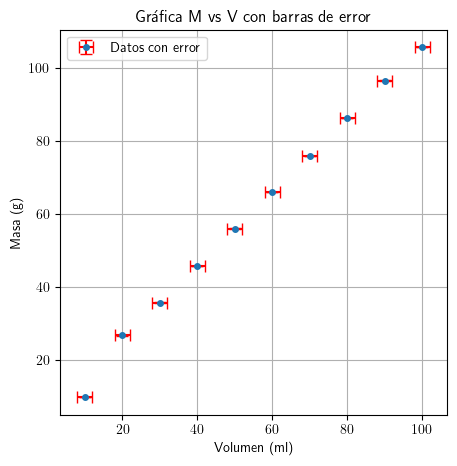

In [15]:
# Estos son los errores correspondientes a las columnas dM y dV en la tabla anterior. 
error_M = np.ones(len(M))*dMasa_inst, 
error_V =  np.ones(len(M))*dVolumen_inst
# Crear la figura
fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

# Graficar con barras de error. Vease el orden en que 
# se colocan V (eje "x")  y M (eje "y") . Ambos un conjunto de mediciones. 
plt.errorbar(V, M, 
             xerr=error_V,
             yerr=error_M, 
             fmt='o', 
             ecolor='red', 
             capsize=4, 
             label='Datos con error', 
             markersize=4)

# Etiquetas y título
#plt.plot(V, M)
plt.xlabel('Volumen (ml)')
plt.ylabel('Masa (g)')
plt.title('Gráfica M vs V con barras de error')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
#plt.savefig("MvsV2.pdf") 
plt.show()

## Nota: Observen que hasta ahora he trabajado con g/ml esto facilita la visualizción de los datos. Evita trabajar con expresiones numericas muy grandes 1 g = 0.001 kg
## 1 mL = 0.000001 m³ = 1 × 10⁻⁶ m³

### Ajuste lineal $M = mV+b$ Usando Metodo de Minimos Cuadrados. 
Primero usemos la Paqueteria Polyfit integrada en Python para obtener el vaor de $m$ y $b$. 

Para calcular los residuos consideramos la siguiente formula: 
$$ Residuos = y_i-[y_{teorica}(x_{i})]$$
donde $y_i = M_i$ y $x_i = V_i$ son las masas  y los volumenes medidos. Entonces
$$ Residuos = M_i-[m*V_i+b]$$
que hemos calculado en la linea de codigo $\textbf{residuos = M - (m * V + b)}$. Imprimimos los valores de los residuos para cada uno de los puntos. Un analisis más formal requiere el calculo de los residuos estandarizados. Dejaremos este analisis para posteriores practicas. 


m =  1.0304848484848481 b =  3.773333333333298
Pendiente (m): 1.0304848484848481
Intercepto (b): 3.773333333333298
Ecuación: M = 1.030*V + 3.773

Residuos:
Punto 1: Residuo = -4.08
Punto 2: Residuo = 2.42
Punto 3: Residuo = 1.11
Punto 4: Residuo = 0.81
Punto 5: Residuo = 0.70
Punto 6: Residuo = 0.40
Punto 7: Residuo = -0.11
Punto 8: Residuo = -0.01
Punto 9: Residuo = -0.02
Punto 10: Residuo = -1.22


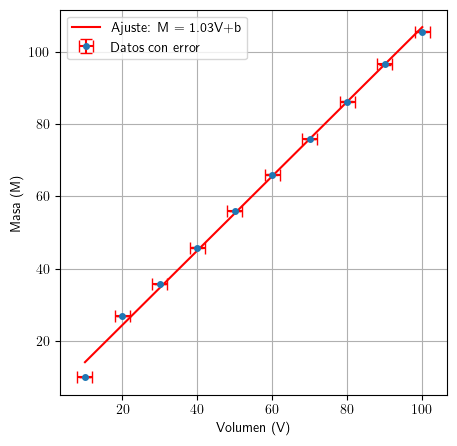

In [16]:
# Ajuste lineal: grado 1
grado = 1 # grado del polinomio a ajustar 
m, b = np.polyfit(V, M, grado)
print('m = ', m, 'b = ', b)

print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Ecuación: M = {m:.3f}*V + {b:.3f}")

# Valores ajustados
V_fit = np.linspace(10, 100, 100)
M_fit = m * V_fit +b

fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

plt.errorbar(V, M, 
             xerr=error_V,
             yerr=error_M, 
             fmt='o', 
             ecolor='red', 
             capsize=4, 
             label='Datos con error', 
             markersize=4)
# Calcular residuos
residuos = M - (m * V + b)
print("\nResiduos:")
for i, r in enumerate(residuos):
    print(f"Punto {i+1}: Residuo = {r:.2f}")
    
#plt.plot(V, M, color='blue', label='Datos' )
plt.plot(V_fit, M_fit, 'r-', label=f'Ajuste: M = {m:.2f}V+b')
plt.xlabel('Volumen (V)')
plt.ylabel('Masa (M)')
plt.legend()
plt.grid(True)
plt.savefig("MvsV2AL.pdf") 
plt.show()

### Histograma de los residuos 
$$ Residuos = M_i-[m*V_i+b]$$
divididos en 10 bins. La distribución es casi normal. Debemos descartar el primer valor con residuo = Punto 1: Residuo = -4.08. 

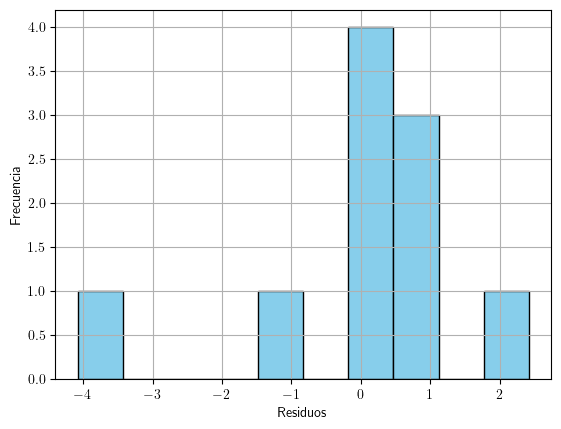

In [20]:
# Los residuos casi siguen una distrubución normal. Debemos descartar el punto con residuo = -4.08
plt.hist(residuos, bins=10, color='skyblue', edgecolor='black') 
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
#plt.savefig("ResHis.pdf") 
plt.grid()
plt.show()

### Analisis usando scipy. 
Podemos hacer un analisis similar usando la paqueteria stats de scipy. De donde obtenemos un valor para R-squared. En practicas posteriores calcularemos explicitamente este valor. Notese que el valor de std_err = 0.020 no es la misma que hemos obtenido para $\sigma_{\rho,m} = 0.029$ dado que std_err se calcula usando la expresion (12.4) del libro de Estadistica de Devore 
$$\sigma_{\beta_1}^2 = \frac{1}{S_{XX}}\frac{\sum(y_{i}-y_{i, teorica})^2}{(n-2)}$$. Abajo definiremos $S_{XX}$. 

In [21]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(V, M)
print("std_err:", f'{std_err:.3f}')
print("Pendiente:", f'{slope:.2f}')
print("Intercepto:", f'{intercept:.2f}')
print("R-squared:", r_value**2)

std_err: 0.020
Pendiente: 1.03
Intercepto: 3.77
R-squared: 0.9969821893352584


### Calculo explicito del Mejor ajuste 
$$m = \frac{\sum_i(x_i-\bar{x}))(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2}$$ 
$$b = \bar{y}-m\bar{x}$$ 

donde $S_{XX} = \sum_i(x_i-\bar{x})^2$ y $S_{xy} = \sum_i(x_i-\bar{x}))(y_i-\bar{y})$, ver eq. 12.2 y 12.3 del libro de Devore. En nuestro caso $x_i = V_i$ y $y_i = M_i$. Estas expresiones están programadas abajo y corroboran los resultados anteriores. 

In [35]:
# Paso 1: calcular promedios
M_mean = sum(M) / len(M)
V_mean = sum(V) / len(V)

# Paso 2: calcular la pendiente m
num = sum((V - V_mean) * (M - M_mean))
den = sum((V - V_mean) ** 2)
m = num / den

# Paso 3: calcular la intersección b
b = M_mean - m * V_mean

# Resultados
print(f"Pendiente m = {m:.4f}")
print(f"Intersección b = {b:.4f}")
print(f"Ecuación de la recta: M = {m:.4f} V + {b:.4f}")

residuos = M - (m * V + b)
print("\nResiduos:")
for i, r in enumerate(residuos):
    print(f"Punto {i+1}: Residuo = {r:.2f} g")

Pendiente m = 1.0305
Intersección b = 3.7733
Ecuación de la recta: M = 1.0305 V + 3.7733

Residuos:
Punto 1: Residuo = -4.08 g
Punto 2: Residuo = 2.42 g
Punto 3: Residuo = 1.11 g
Punto 4: Residuo = 0.81 g
Punto 5: Residuo = 0.70 g
Punto 6: Residuo = 0.40 g
Punto 7: Residuo = -0.11 g
Punto 8: Residuo = -0.01 g
Punto 9: Residuo = -0.02 g
Punto 10: Residuo = -1.22 g


# Para las muestras Solidad
Los volumenes de las muestras de aluminio se calculan de la siguiente forma: 
$$Volumen\;prisma = V_p (x,y,z)=x*y*z $$
$$Volumen\;cilindro = V_c(D,h) =\frac{\pi D^2h}{4} $$
la densidad esta dada por 
$$\rho = \frac{M}{V}$$
Para los siguientes calculos he inventado algunas mediciones como muestra. 

In [6]:
# Errores de Instrumentos (para una sola medición el error absoluto está dado por el error del instrumento)
dMasa_inst = 0.05 #bascula 
dVolumen_inst = 0.2 # probeta 
dx = dy = dz = dD = dh = 0.01 #  Debemos calcular el error instrumental propagado del Volumen (dx ==> error de Vernier)

## Error Asociado a  V: 
Al cualcular el Volumen midiendo el diametro y la altura del cilndro (o los lados del prisma rectangular) debemos realizar la siguiente operación para cada medicion: 
$$\Delta V_p =  \sqrt{(yz)^2E_{a,x}^2+(xz)^2E_{a,y}^2+(xy)^2E_{a,z}^2}$$
$$\Delta V_c =  \sqrt{\left(\frac{\pi Dh}{2}\right)^2E_{a,D}^2+\left(\frac{\pi D^2}{4}\right)^2E_{a,h}^2}$$
Esto lo realizamos abajo una vez que definimos las funciones Delta_VC y Delta_V. 
## Error Asociado a  $\rho$: 
$$\Delta\rho =  \sqrt{(1/\bar{V})^2E_{a,M}^2+(-\bar{M}/\bar{V}^2)^2E_{a,V}^2}$$
$$\rho_r = \bar{\rho}\pm \Delta \rho$$
aqui debemos usar el promedio de M y V. Sin embargo dado que los errores son pequeños pordemos considerar $\Delta\rho = \sigma_{\rho,m}$. Esto depende de su personal criterio. Haremos eesto abajo. Como ejemplo consideraremos ue todas las medidas era sobre muestras cilindricas.  

In [3]:
def Delta_V (x, y, z, dx, dy,dz): 
    # dx, dy, dz ==> errores en la medicion x, y, z 
    del_V = np.sqrt(((y*z) * dx)**2 + ((x*z) * dy)**2+((x*y) * dz)**2)
    return del_V

In [4]:
def Delta_VC (D, h, dD, dh): 
    # dx, dy, dz ==> errores en la medicion x, y, z 
    del_VC = np.sqrt(((np.pi*D*h/2) * dD)**2 + ((np.pi*D**2/2) * dh)**2)
    return del_VC

In [7]:
M = np.array([10, 20, 30, 40, 50, 60]) 
D = np.array([1.34, 1.78, 1.62, 1.11, 1.95, 1.25])
h = np.array([2.83, 2.82, 4.34, 16.72, 6.66, 19.65])
V = np.pi*D**2*h/4
print('M=', M, 'g')
print('V=', V, 'cm^3')
rho = M/V
print('rho= ', rho, 'g/cm^3')

DeltaVC_inst = []
for i,j in enumerate(D): 
    DeltaVC_inst.append( Delta_VC (j, i, dD, dh))
    
    

M= [10 20 30 40 50 60] g
V= [ 3.99103847  7.01744463  8.9456034  16.17976137 19.8899336  24.11417799] cm^3
rho=  [2.50561353 2.8500403  3.35360273 2.47222435 2.51383444 2.48816277] g/cm^3


In [12]:
# Crear DataFrame (Crearemos.  una tabla con todos los valores requeridos). 
df = pd.DataFrame({
    "M": M,
    "V": V,
    "D": D, 
    "h": h, 
    "dh = dD": np.ones(len(M))*dx,
    "\rho":  M/V,
    "dM": np.ones(len(M))*dMasa_inst, 
    "dV": np.array(DeltaVC_inst),  
    "Error_p" : np.abs(M/V-np.mean(M/V))/np.mean(M/V)*100
}, index=pd.Index(range(1, len(M)+1), name="Medición"))

print(df)

# Notese que el error propagado al volumen es variable. Esto se vera reflejado en as graficas con barras de error. 

           M          V     D      h  dh = dD      \rho    dM        dV  \
Medición                                                                  
1         10   3.991038  1.34   2.83     0.01  2.505614  0.05  0.028205   
2         20   7.017445  1.78   2.82     0.01  2.850040  0.05  0.057085   
3         30   8.945603  1.62   4.34     0.01  3.353603  0.05  0.065495   
4         40  16.179761  1.11  16.72     0.01  2.472224  0.05  0.055773   
5         50  19.889934  1.95   6.66     0.01  2.513834  0.05  0.136306   
6         60  24.114178  1.25  19.65     0.01  2.488163  0.05  0.101196   

            Error_p  
Medición             
1          7.104758  
2          5.664812  
3         24.334313  
4          8.342657  
5          6.799969  
6          7.751742  


In [9]:
## Notese que hemos despreciado el error de los instrumentos por que es muy pequeño. Es valido hacerlo en este caso? Sino cómo harian el analisis? 

# Media de rho
rhom = met.media(rho)
# Desvisacion estandar rho
drho_est = met.error_estandar_media(rho)
display(Math(r"\sigma_{\rho} =" f'{drho_est:.2f}'))
# Error absoluto 
# Valor reportado
display(Math(r"\rho_r="f'{rhom:.2f}\pm{drho_est:.2f}\; g/ml'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

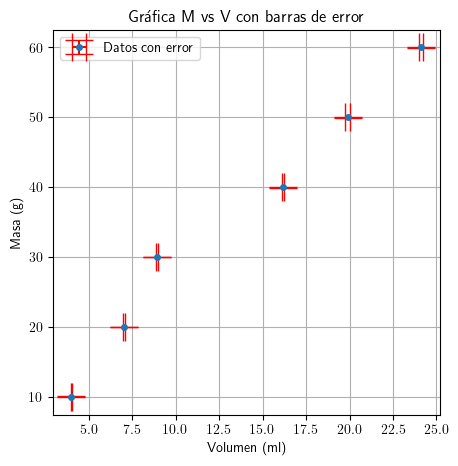

In [22]:
error_M = np.ones(len(M))*dMasa_inst
error_V = np.array(DeltaVC_inst)

# Crear la figura
fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

# Graficar con barras de error
plt.errorbar(V, M, 
             xerr=error_V,
             yerr=error_M, 
             fmt='o', 
             ecolor='red', 
             capsize=10, 
             label='Datos con error', 
             markersize=4)

# Etiquetas y título
#plt.plot(V, M)
plt.xlabel('Volumen (ml)')
plt.ylabel('Masa (g)')
plt.title('Gráfica M vs V con barras de error')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
#plt.savefig("MvsV2.pdf") 
plt.show()

m =  2.3342470136886058 b =  3.8230345803273527
Pendiente (m): 2.3342470136886058
Intercepto (b): 3.8230345803273527
Ecuación: M = 2.334*V + 3.823

Residuos:
Punto 1: Residuo = -3.14 g
Punto 2: Residuo = -0.20 g
Punto 3: Residuo = 5.30 g
Punto 4: Residuo = -1.59 g
Punto 5: Residuo = -0.25 g
Punto 6: Residuo = -0.11 g


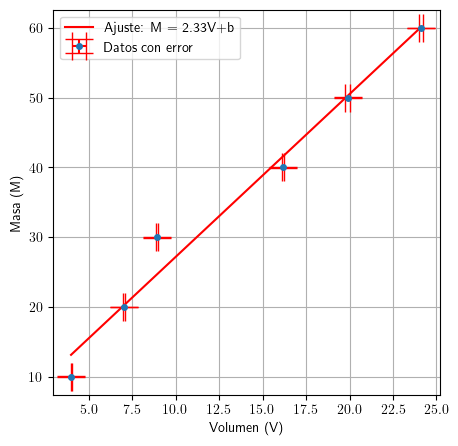

In [19]:
# Ajuste lineal: grado 1
m, b = np.polyfit(V, M, 1)
print('m = ', m, 'b = ', b)

print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Ecuación: M = {m:.3f}*V + {b:.3f}")

# Valores ajustados
V_fit = np.linspace(np.min(V), np.max(V), 100)
M_fit = m * V_fit +b

fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

plt.errorbar(V, M, 
             xerr=error_V,
             yerr=error_M, 
             fmt='o', 
             ecolor='red', 
             capsize=10, 
             label='Datos con error', 
             markersize=4)
# Calcular residuos
residuos = M - (m * V + b)
print("\nResiduos:")
for i, r in enumerate(residuos):
    print(f"Punto {i+1}: Residuo = {r:.2f} g")
    
#plt.plot(V, M, color='blue', label='Datos' )
plt.plot(V_fit, M_fit, 'r-', label=f'Ajuste: M = {m:.2f}V+b')
plt.xlabel('Volumen (V)')
plt.ylabel('Masa (M)')
plt.legend()
plt.grid(True)
plt.savefig("MvsV2AL.pdf") 
plt.show()